In [137]:
import os
import pickle as pkl

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option("max_colwidth", None)
pd.set_option("max_seq_items", None)

In [28]:
TRAIN_DATA_PATH = "../cicddos_data/out/train.csv"
TEST_DATA_PATH = "../cicddos_data/out/test.csv"

In [80]:
train_df = pd.read_csv(TRAIN_DATA_PATH, low_memory=False)
test_df = pd.read_csv(TEST_DATA_PATH, low_memory=False)

In [73]:
train_df['Label'] = (train_df['Label'] != 'BENIGN')*1.0
test_df['Label'] = (test_df['Label'] != 'BENIGN')*1.0

In [50]:
req_columns = ['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Length of Fwd Packets', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Flow IAT Mean', 'Flow IAT Std',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Min',
       'Fwd PSH Flags', 'Fwd Header Length', 'Fwd Packets/s', 'Packet Length Mean', 'Packet Length Std',
       'SYN Flag Count', 'RST Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'Average Packet Size', 'Avg Fwd Segment Size', 'Fwd Header Length.1',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Init_Win_bytes_forward',
       'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std',
       'Idle Mean', 'Idle Std', 'Inbound']

In [33]:
X_train_cat = train_df[categoric_cols]
X_train_num = train_df[numeric_cols]
X_test_cat = test_df[categoric_cols]
X_test_num = test_df[numeric_cols]

## Analysing data

In [90]:
corr_matrix = train_df[req_columns + ['Label']].corr()

In [106]:
corr_matrix['Label'].abs().sort_values(ascending=False)[0:-10].index.to_list()

['Label',
 'Inbound',
 'URG Flag Count',
 'Fwd PSH Flags',
 'RST Flag Count',
 'CWE Flag Count',
 'Packet Length Std',
 'Init_Win_bytes_forward',
 'Fwd Packet Length Std',
 'Active Mean',
 'Protocol',
 'Idle Mean',
 'Avg Fwd Segment Size',
 'Fwd Packet Length Mean',
 'Fwd Packets/s',
 'Packet Length Mean',
 'Average Packet Size',
 'Fwd IAT Min',
 'Flow Duration',
 'Fwd IAT Total',
 'Active Std',
 'SYN Flag Count',
 'Fwd IAT Std',
 'Flow IAT Std',
 'Subflow Fwd Bytes',
 'Total Length of Fwd Packets']

In [109]:
def get_imp_columns(series):
    return series.abs().sort_values(ascending=False)[0:-10].index.to_list()


imp_columns = get_imp_columns(corr_matrix['Label'])

#### Plotting scatter_matrix

In [97]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='Label', ylabel='Label'>,
        <AxesSubplot:xlabel='Inbound', ylabel='Label'>,
        <AxesSubplot:xlabel='URG Flag Count', ylabel='Label'>,
        <AxesSubplot:xlabel='Fwd PSH Flags', ylabel='Label'>,
        <AxesSubplot:xlabel='RST Flag Count', ylabel='Label'>,
        <AxesSubplot:xlabel='CWE Flag Count', ylabel='Label'>,
        <AxesSubplot:xlabel='Packet Length Std', ylabel='Label'>,
        <AxesSubplot:xlabel='Init_Win_bytes_forward', ylabel='Label'>,
        <AxesSubplot:xlabel='Fwd Packet Length Std', ylabel='Label'>,
        <AxesSubplot:xlabel='Active Mean', ylabel='Label'>,
        <AxesSubplot:xlabel='Protocol', ylabel='Label'>,
        <AxesSubplot:xlabel='Idle Mean', ylabel='Label'>,
        <AxesSubplot:xlabel='Avg Fwd Segment Size', ylabel='Label'>,
        <AxesSubplot:xlabel='Fwd Packet Length Mean', ylabel='Label'>,
        <AxesSubplot:xlabel='Fwd Packets/s', ylabel='Label'>,
        <AxesSubplot:xlabel='Packet Length Mean', ylabe

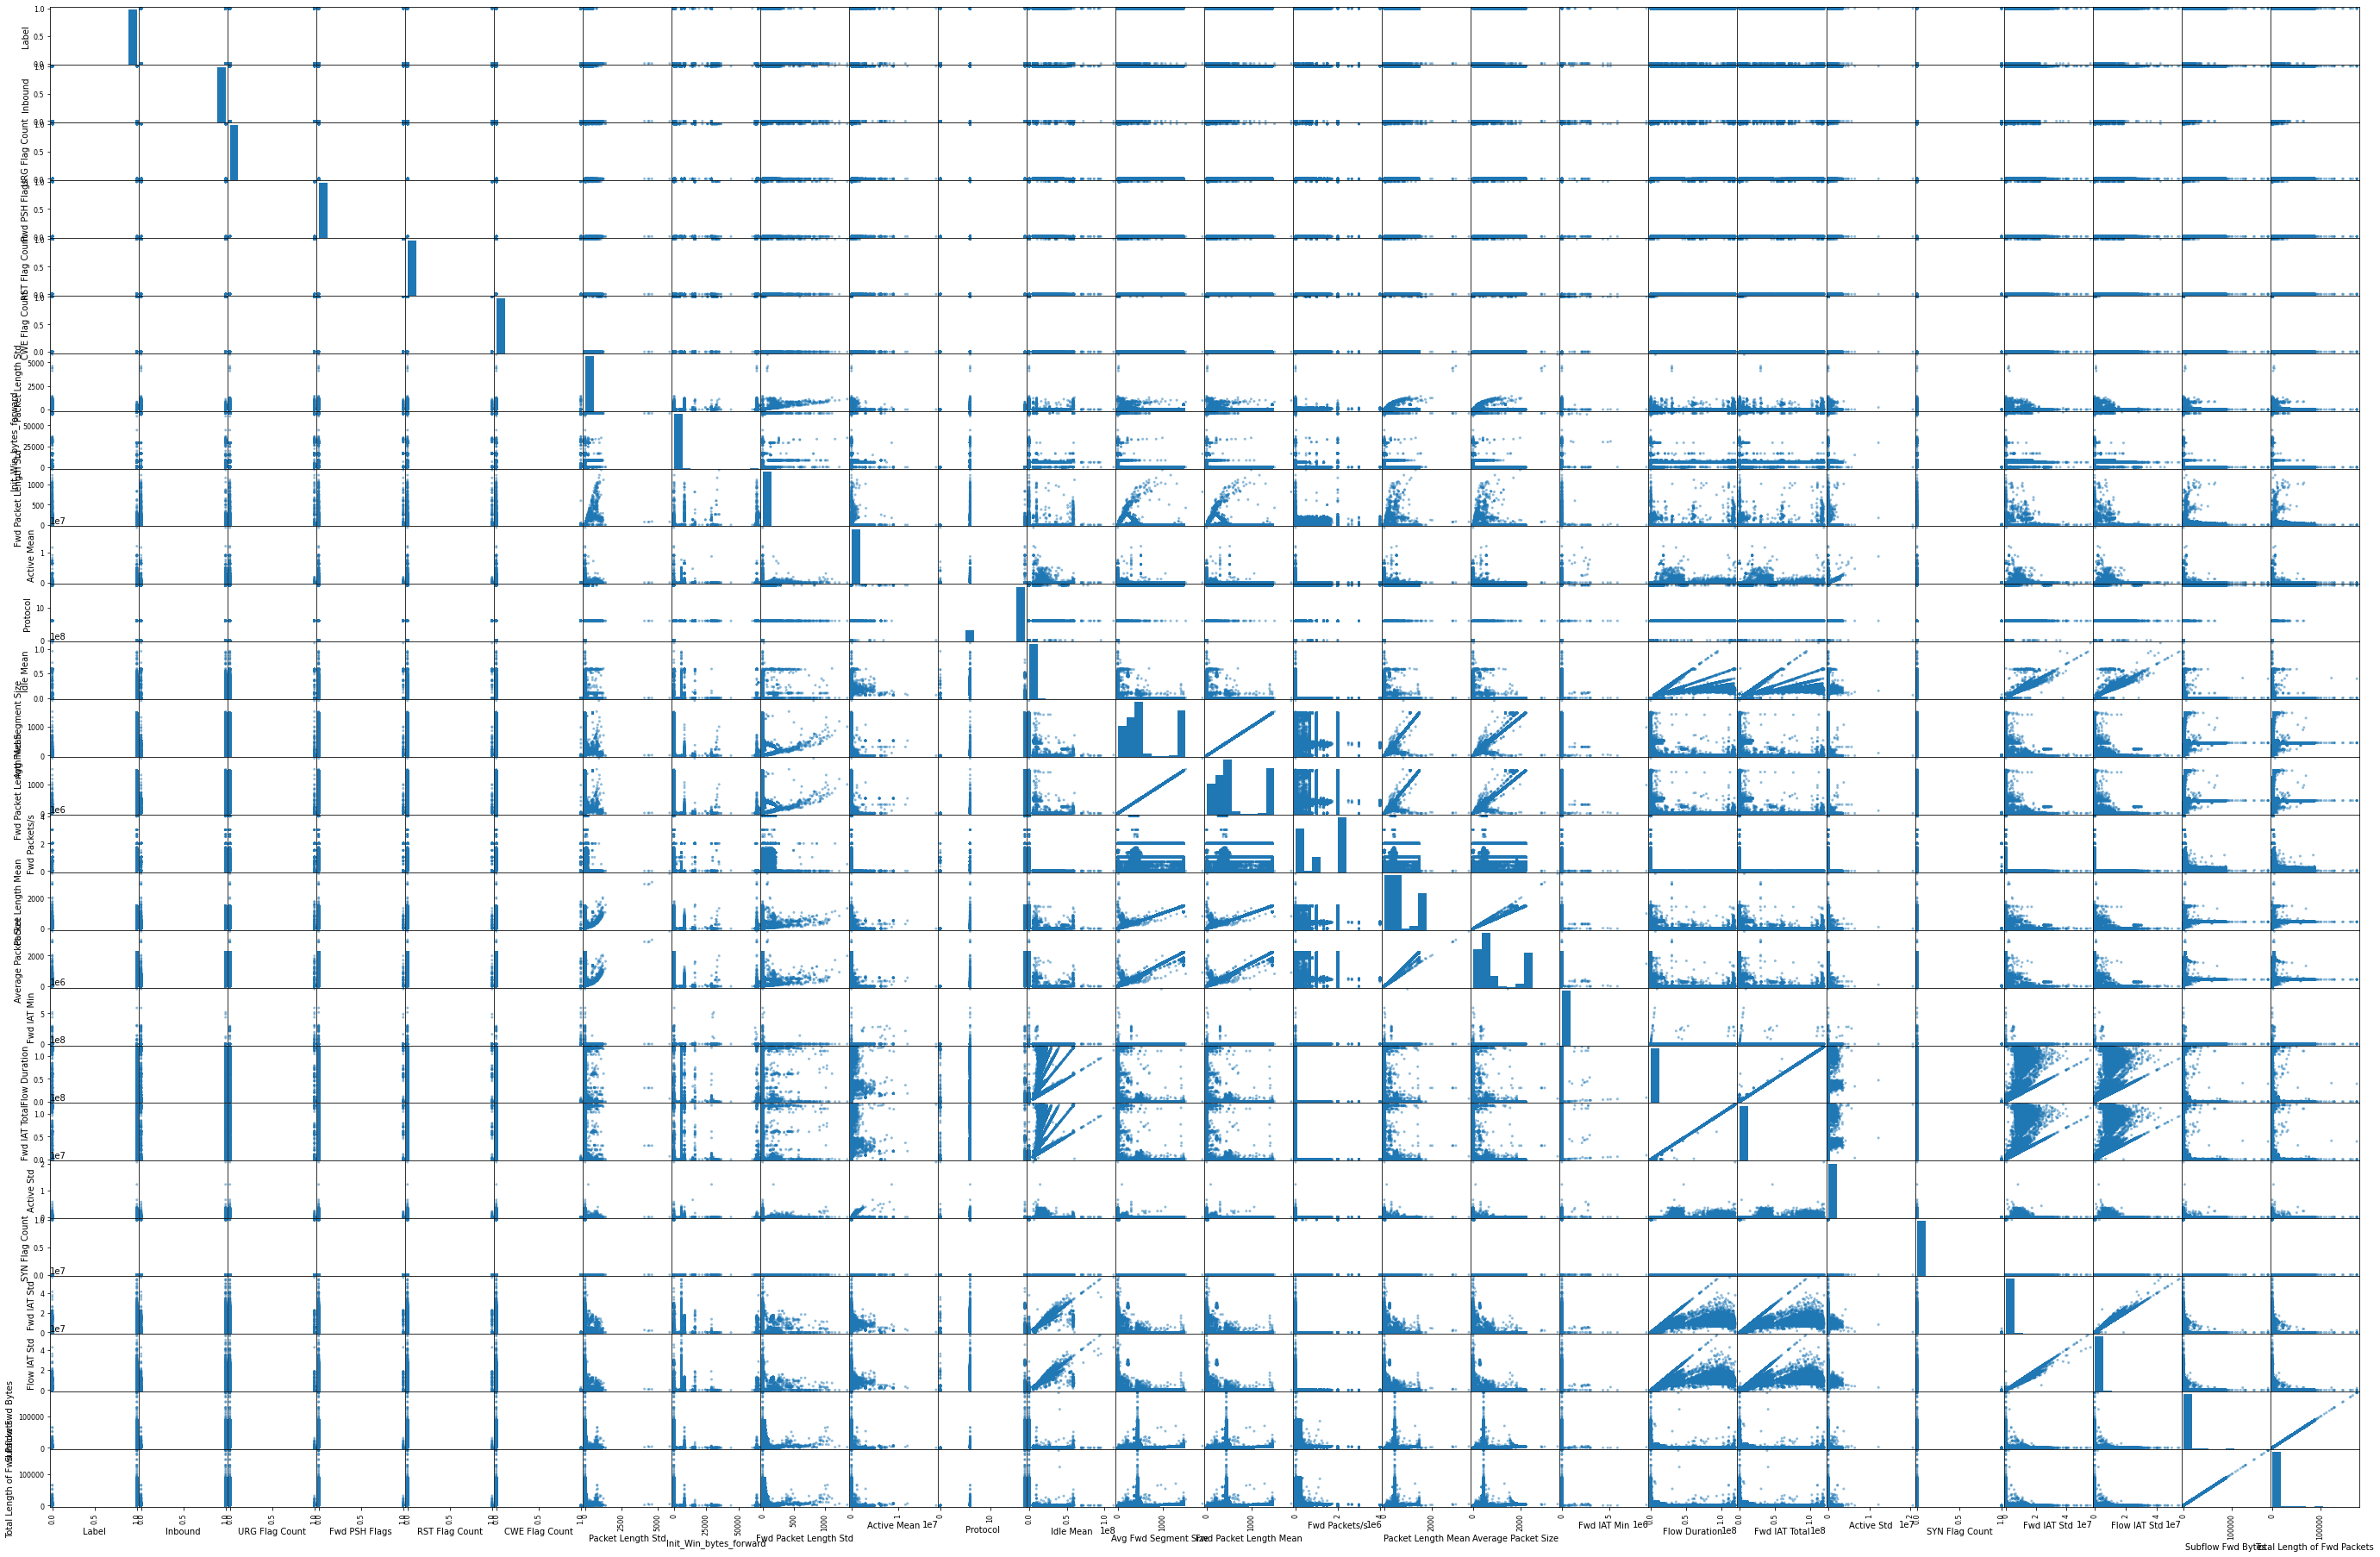

In [112]:
scatter_matrix(train_df[imp_columns], figsize=(48, 32))

## Splitting

In [117]:
label_cols = ['Label']

numeric_cols = ['URG Flag Count', 'Fwd PSH Flags',
    'RST Flag Count', 'CWE Flag Count', 'Packet Length Std',
    'Init_Win_bytes_forward', 'Fwd Packet Length Std', 'Active Mean',
    'Idle Mean', 'Avg Fwd Segment Size',
    'Fwd Packet Length Mean', 'Fwd Packets/s', 'Packet Length Mean',
    'Average Packet Size', 'Fwd IAT Min', 'Flow Duration',
    'Fwd IAT Total', 'Active Std', 'SYN Flag Count', 'Fwd IAT Std', 
    'Flow IAT Std', 'Subflow Fwd Bytes', 'Total Length of Fwd Packets']

categoric_cols = [
    'Protocol',
    'Inbound'
]

In [118]:
Y_train = train_df[label_cols]
Y_test = test_df[label_cols]

In [119]:
X_train_num = train_df[numeric_cols]
X_train_cat = train_df[categoric_cols]

X_test_num = test_df[numeric_cols]
X_test_cat = test_df[categoric_cols]

Splitted datasets sets are saved as csv files in 

`/home/ubuntu/projects/ddos/cicddos_data/core`

saving: (one time run)

# TESTING

## Scaling

In [127]:
X_train_num.head()

,URG Flag Count,Fwd PSH Flags,RST Flag Count,CWE Flag Count,Packet Length Std,Init_Win_bytes_forward,Fwd Packet Length Std,Active Mean,Idle Mean,Avg Fwd Segment Size,Fwd Packet Length Mean,Fwd Packets/s,Packet Length Mean,Average Packet Size,Fwd IAT Min,Flow Duration,Fwd IAT Total,Active Std,SYN Flag Count,Fwd IAT Std,Flow IAT Std,Subflow Fwd Bytes,Total Length of Fwd Packets
0,0,0,0,0,21.36118,-1,22.51666,0.0,0.0,349.5,349.5,37.998613,345.6,432.0,0.0,105267,105267.0,0.0,0,60775.064763,60775.064763,1398,1398.0
1,0,0,0,0,21.36118,-1,22.51666,0.0,0.0,349.5,349.5,37.061058,345.6,432.0,1.0,107930,107930.0,0.0,0,62311.682503,62311.682503,1398,1398.0
2,0,0,0,0,0.00000,-1,0.00000,0.0,0.0,500.0,500.0,1000000.000000,500.0,750.0,2.0,2,2.0,0.0,0,0.000000,0.000000,1000,1000.0
3,0,0,0,0,0.00000,-1,0.00000,0.0,0.0,401.0,401.0,42553.191489,401.0,601.5,47.0,47,47.0,0.0,0,0.000000,0.000000,802,802.0
4,0,0,0,0,0.00000,-1,0.00000,0.0,0.0,383.0,383.0,0.000000,383.0,574.5,0.0,0,0.0,0.0,0,0.000000,0.000000,766,766.0


In [125]:
def standard_scale_df(df):
    std_scaler = StandardScaler()
    scaled_arr = std_scaler.fit_transform(df)
    
    return pd.DataFrame(scaled_arr, columns=df.columns)

In [129]:
X_train_num_scaled = standard_scale_df(X_train_num)
X_test_num_scaled = standard_scale_df(X_test_num)

## Categorical attr - Encoding

In [130]:
X_train_cat.head()

,Protocol,Inbound
0,17,1
1,17,1
2,17,1
3,17,1
4,17,1


In [157]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [158]:
X_train_cat_one_hot = one_hot_encoder.fit_transform(X_train_cat)

In [148]:
X_train_cat_one_hot.toarray()

array([[0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       ...,
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.]])

In [159]:
X_train_cat_one_hot

array([[0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       ...,
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.]])